<a href="https://colab.research.google.com/github/Khuzamaalk/T5_BootCamp/blob/main/PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA**







#Step 1 : import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [ ]:
data = load_breast_cancer(as_frame=True)
df = data.frame


In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [ ]:
X = df.drop("target", axis = 1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
df_pca = pd.DataFrame(X_train_pca, columns=['PC 1', 'PC 2', 'PC 3'])
print(df_pca)

         PC 1      PC 2      PC 3
0    4.244903  9.131428  1.504262
1    9.053755  0.475310 -3.198215
2   -2.275374  3.278471  2.816370
3   -2.510453  0.743743 -0.736034
4   -2.302848  2.665155  1.192885
..        ...       ...       ...
450 -0.368252  7.231415  3.805657
451 -0.686605  1.781220 -0.693044
452 -4.500654 -3.067808 -0.031045
453  0.728285  0.426287 -2.730932
454 -3.403925 -1.330388 -0.149210

[455 rows x 3 columns]


Shape of X_train_pca: (455, 3)
Shape of y_train: (455,)


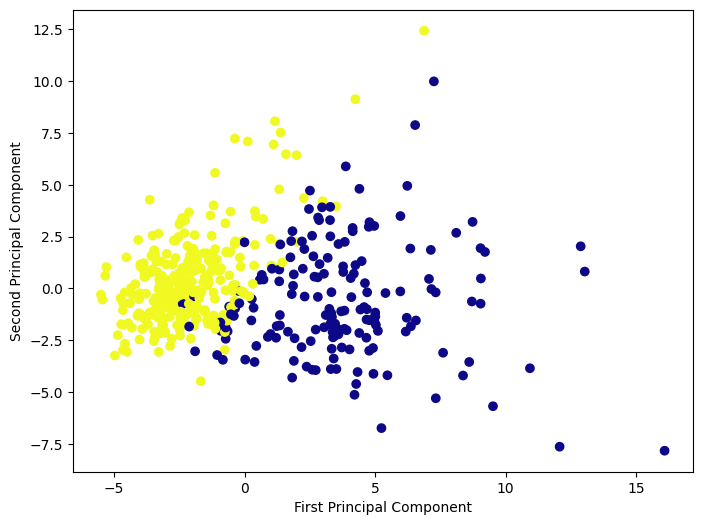

In [ ]:
plt.figure(figsize=(8, 6))

print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train:", y_train.shape)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#Step 6: Fitting Logistic Regression To the training set




In [ ]:
from sklearn.linear_model import LogisticRegression

LG = LogisticRegression()
LG.fit(X_train_pca, y_train)

LogisticRegression()

#Step 7: Predicting the test set result




In [ ]:
y_pred_test = LG.predict(X_test_pca)
print(y_pred_test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


#Step 8: Making the confusion matrix




In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print(cm)


[[41  2]
 [ 0 71]]


In [ ]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", acc_test)

Test Accuracy: 0.9824561403508771


#Step 9: Predicting the training set result




In [ ]:
y_pred_train = LG.predict(X_train_pca)
print(y_pred_train)

[1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1
 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 1]


In [ ]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", acc_train)

Training Accuracy: 0.9516483516483516


#Step 10: Visualizing the Test set results




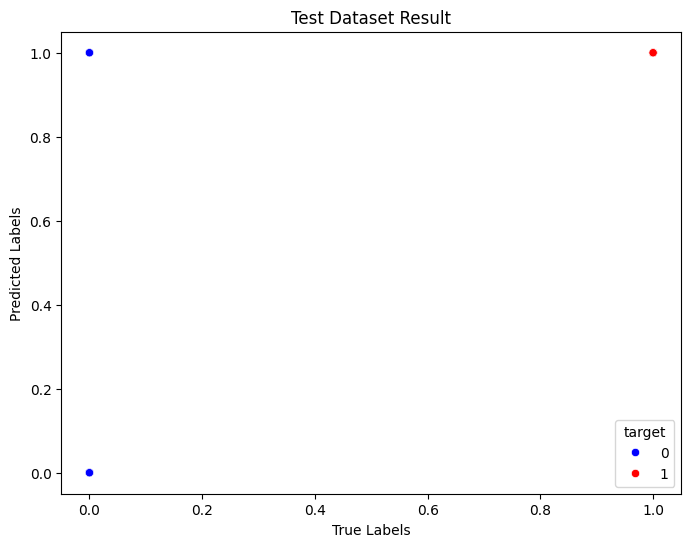

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test, hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.title('Test Dataset Result')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

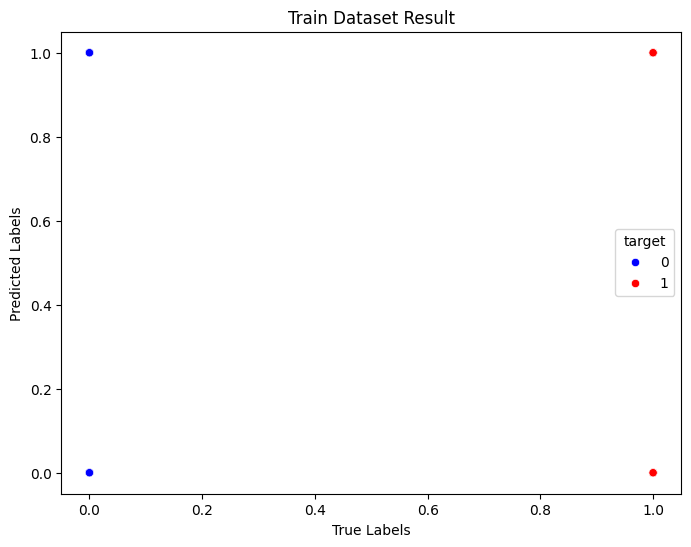

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_pred_train, hue=y_train, palette={0: 'blue', 1: 'red'}, marker='o')
plt.title('Train Dataset Result')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [ ]:
pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)

In [ ]:
df_pca2 = pd.DataFrame(X_train_pca2, columns=['PC 1', 'PC 2'])
print(df_pca2)

         PC 1      PC 2
0    4.244903  9.131428
1    9.053755  0.475310
2   -2.275374  3.278471
3   -2.510453  0.743743
4   -2.302848  2.665155
..        ...       ...
450 -0.368252  7.231415
451 -0.686605  1.781220
452 -4.500654 -3.067808
453  0.728285  0.426287
454 -3.403925 -1.330388

[455 rows x 2 columns]


Shape of X_train_pca: (455, 2)
Shape of y_train: (455,)


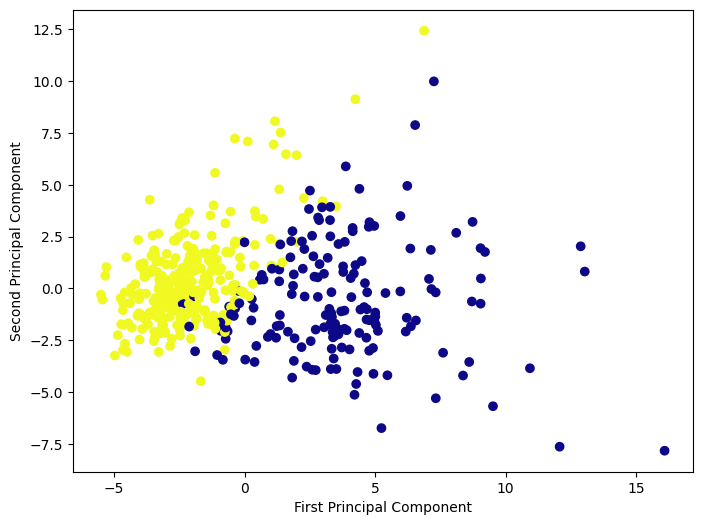

In [ ]:
plt.figure(figsize=(8, 6))

print("Shape of X_train_pca:", X_train_pca2.shape)
print("Shape of y_train:", y_train.shape)

plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=y_train, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
LG = LogisticRegression()
LG.fit(X_train_pca2, y_train)

LogisticRegression()

In [ ]:
y_pred_test2 = LG.predict(X_test_pca2)
print(y_pred_test2)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print(cm)


[[41  2]
 [ 0 71]]


In [ ]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_pred_test2)
print("Test Accuracy:", acc_test)

Test Accuracy: 0.9912280701754386


In [ ]:
y_pred_train2 = LG.predict(X_train_pca2)
print(y_pred_train2)

[1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1
 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1
 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 1 1 0 1]


In [ ]:
acc_train = accuracy_score(y_train, y_pred_train2)
print("Training Accuracy:", acc_train)

Training Accuracy: 0.9472527472527472


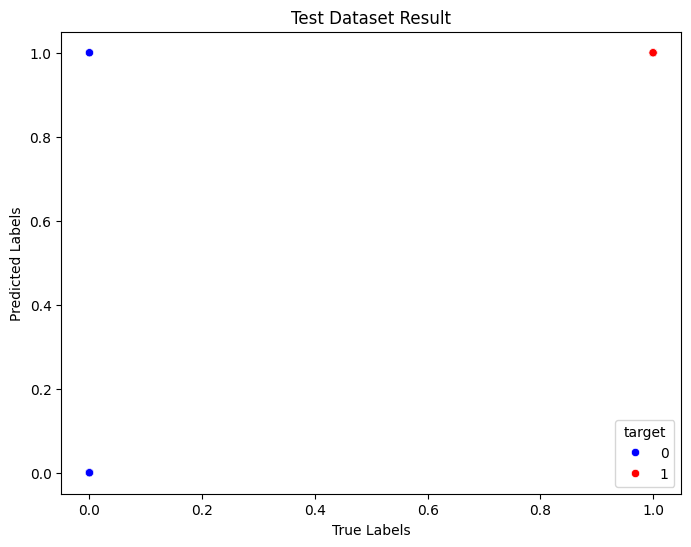

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test2, hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.title('Test Dataset Result')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

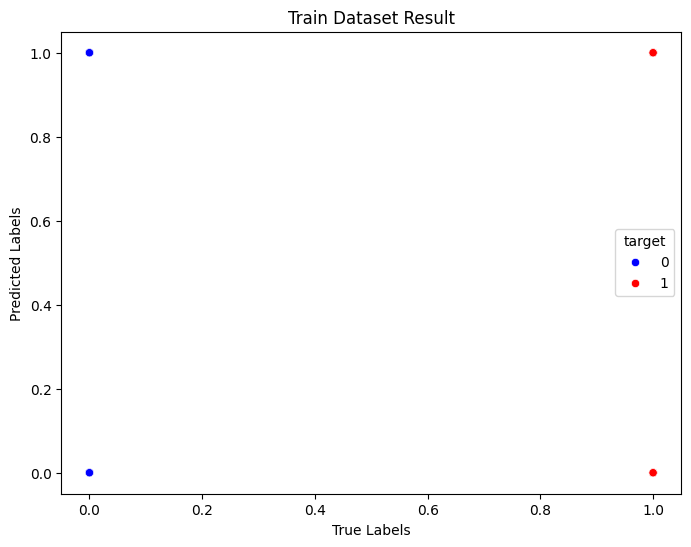

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_pred_train2, hue=y_train, palette={0: 'blue', 1: 'red'}, marker='o')
plt.title('Train Dataset Result')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

#**Well Done :)**
Now let's practice!